<a href="https://colab.research.google.com/github/icampuzanov/SIS420-2_2023/blob/main/Campuzano_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [111]:
#Carga de dataset
data = pd.read_csv('/content/train.csv')

In [112]:
print(data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [114]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns


In [115]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [116]:
#resultado
print(data)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...        

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [118]:
#llenar datos vacios
columnas_especificas = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [120]:
columnas_seleccionadas = [3] + [4] + [12]  + [16] + [19] + [26] + [34] + [46] + [53] + [59] + [61]
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 80]
m = y.size
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   Neighborhood  1460 non-null   int64  
 3   HouseStyle    1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   MasVnrArea    1460 non-null   float64
 6   BsmtFinSF1    1460 non-null   int64  
 7   GrLivArea     1460 non-null   int64  
 8   KitchenQual   1460 non-null   int64  
 9   GarageYrBlt   1460 non-null   float64
 10  GarageCars    1460 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 125.6 KB


In [121]:
print(X)
print('*'*25)
print(y)

      LotFrontage  LotArea  Neighborhood  HouseStyle  YearBuilt  MasVnrArea  \
0            65.0     8450             5           5       2003       196.0   
1            80.0     9600            24           2       1976         0.0   
2            68.0    11250             5           5       2001       162.0   
3            60.0     9550             6           5       1915         0.0   
4            84.0    14260            15           5       2000       350.0   
...           ...      ...           ...         ...        ...         ...   
1455         62.0     7917             8           5       1999         0.0   
1456         85.0    13175            14           2       1978       119.0   
1457         66.0     9042             6           5       1941         0.0   
1458         68.0     9717            12           2       1950         0.0   
1459         75.0     9937             7           2       1965         0.0   

      BsmtFinSF1  GrLivArea  KitchenQual  GarageYrB

In [122]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [123]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      LotFrontage  LotArea  Neighborhood  HouseStyle  YearBuilt  MasVnrArea  \
0            65.0     8450             5           5       2003       196.0   
1            80.0     9600            24           2       1976         0.0   
2            68.0    11250             5           5       2001       162.0   
3            60.0     9550             6           5       1915         0.0   
4            84.0    14260            15           5       2000       350.0   
...           ...      ...           ...         ...        ...         ...   
1455         62.0     7917             8           5       1999         0.0   
1456         85.0    13175            14           2       1978       119.0   
1457         66.0     9042             6           5       1941         0.0   
1458         68.0     9717            12           2       1950         0.0   
1459         75.0     9937             7           2       1965         0.0   

      BsmtFinSF1  GrLivArea  KitchenQual  GarageYrB

In [124]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [125]:
print(X)

[[ 1.         -0.22937175 -0.20714171 ... -0.40936914  1.02115667
   0.31172464]
 [ 1.          0.4519361  -0.09188637 ...  0.79562873 -0.10448286
   0.31172464]
 [ 1.         -0.09311018  0.07347998 ... -0.40936914  0.93777596
   0.31172464]
 ...
 [ 1.         -0.18395123 -0.14781027 ... -0.40936914 -1.56364521
  -1.02685765]
 [ 1.         -0.09311018 -0.08016039 ... -0.40936914 -1.18843203
  -1.02685765]
 [ 1.          0.22483348 -0.05811155 ...  0.79562873 -0.56307674
  -1.02685765]]


In [126]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [127]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [179705.20427692    600.54039719   5949.53662446   2939.69530125
  -3665.81048428  12334.51951271   7419.55213658   9773.78038212
  31740.4699496  -19018.75170774   4020.06372596  14845.84511019]
El valor predecido es (usando el descenso por el gradiente): 221680.7618


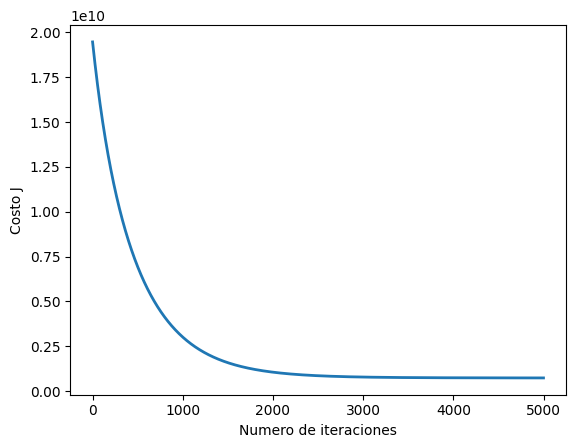

In [128]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 65.0, 8450, 5, 5, 2003, 196.0, 706, 1710, 2, 2003.0, 2]
X_array[1:12] = (X_array[1:12] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [153]:
columnas_seleccionadas = [3] + [4] + [12]  + [16] + [19] + [26] + [34] + [46] + [53] + [59] + [61]
w = data.iloc[:, columnas_seleccionadas]
z = data.iloc[:, 80]
n = z.size
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   Neighborhood  1460 non-null   int64  
 3   HouseStyle    1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   MasVnrArea    1460 non-null   float64
 6   BsmtFinSF1    1460 non-null   int64  
 7   GrLivArea     1460 non-null   int64  
 8   KitchenQual   1460 non-null   int64  
 9   GarageYrBlt   1460 non-null   float64
 10  GarageCars    1460 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 125.6 KB


In [154]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
w = np.concatenate([np.ones((n, 1)), w], axis=1)
print (w)

[[1.000e+00 6.500e+01 8.450e+03 ... 2.000e+00 2.003e+03 2.000e+00]
 [1.000e+00 8.000e+01 9.600e+03 ... 3.000e+00 1.976e+03 2.000e+00]
 [1.000e+00 6.800e+01 1.125e+04 ... 2.000e+00 2.001e+03 2.000e+00]
 ...
 [1.000e+00 6.600e+01 9.042e+03 ... 2.000e+00 1.941e+03 1.000e+00]
 [1.000e+00 6.800e+01 9.717e+03 ... 2.000e+00 1.950e+03 1.000e+00]
 [1.000e+00 7.500e+01 9.937e+03 ... 3.000e+00 1.965e+03 1.000e+00]]


In [155]:
w_array = [1, 65.0, 8450, 5, 5, 2003, 196.0, 706, 1710, 2, 2003.0, 2]

In [156]:
w_array[1:12]

[65.0, 8450, 5, 5, 2003, 196.0, 706, 1710, 2, 2003.0, 2]

In [157]:
def normalEqn(w, z):

    thetas = np.zeros(w.shape[1])

    thetas = np.dot(np.dot(np.linalg.inv(np.dot(w.T,w)),w.T),z)

    return thetas

In [159]:
# Calcula los parametros con la ecuación de la normal
thetas = normalEqn(w, z);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(thetas)));

# Estimar el precio para una casa

w_array = [1, 65.0, 8450, 5, 5, 2003, 196.0, 706, 1710, 2, 2003.0, 2]

price = np.dot(w_array, thetas)

print('Precio predecido para una casa en Los Angeles (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-1.05269900e+06 -1.27002538e+01  5.65476086e-01  4.94534537e+02
 -2.43122159e+03  5.38725719e+02  3.64893626e+01  2.09148910e+01
  6.47451751e+01 -2.25699767e+04  3.87040476e+01  1.86566898e+04]
Precio predecido para una casa en Los Angeles (usando la ecuación de la normal): $222968
